<a href="https://colab.research.google.com/github/taticorrea/OASI/blob/master/dados_meteorologicos_OASI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import statistics as std         #biblioteca de estatistica
import pandas as pd              #biblioteca para DataFrame
import numpy as np               #biblioteca para arrays
import matplotlib.pyplot as plt  #biblioteca para gráficos
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter 
from astropy.time import Time    #biblioteca para manipular datas

 # **Instituto Nacional de Meteorologia - FLORESTA A351** (2011-2019)






## **TODAS**

In [ ]:
#lendo arquivo e limpando dados nulos
df = pd.read_csv('/content/dados_A351_D_2011-01-01_2019-12-31.csv',
                 sep=';',index_col=False,header=0,skiprows=9,decimal=',').dropna(subset=['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)','PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'],axis=0)

del df['Unnamed: 3']    #o arquivo termina com ; e ele reconhece como dado e cria uma coluna com valores tipo NaN

In [ ]:
df

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)"
0,2011-01-01,0.0,47.666667
1,2011-01-02,0.0,52.750000
2,2011-01-03,11.0,68.833333
3,2011-01-04,0.0,58.166667
4,2011-01-05,0.0,51.750000
...,...,...,...
3282,2019-12-27,0.0,45.583333
3283,2019-12-28,0.0,46.791667
3284,2019-12-29,0.0,46.083333
3285,2019-12-30,0.0,49.041667


In [ ]:
#Inicio das observaçoes
it = ['2011-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/365

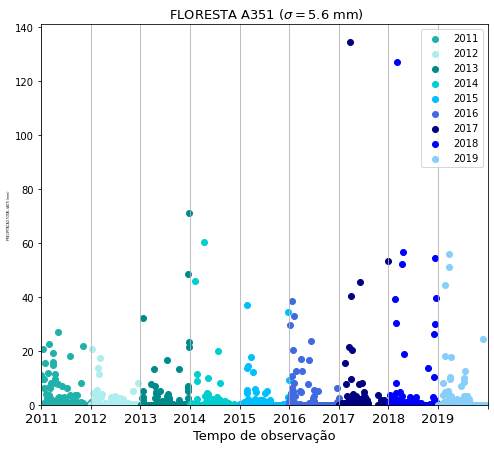

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(t[:365],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][:365],color='lightseagreen',label = '2011')               #2011
plt.scatter(t[365:731],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][365:731],color='paleturquoise',label = '2012')         #2012
plt.scatter(t[731:1095],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][731:1095],color='darkcyan',label = '2013')            #2013
plt.scatter(t[1095:1370],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][1095:1370],color='darkturquoise',label = '2014')     #2014
plt.scatter(t[1370:1735],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][1370:1735],color='deepskyblue',label = '2015')       #2015
plt.scatter(t[1735:2072],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][1735:2072],color='royalblue',label = '2016')         #2016
plt.scatter(t[2072:2365],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][2072:2365],color='navy',label = '2017')              #2017
plt.scatter(t[2365:2730],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][2365:2730],color='blue',label = '2018')              #2018
plt.scatter(t[2730:3063],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][2730:3063],color='lightskyblue',label = '2019')      #2019
plt.title(r' FLORESTA A351 $(\sigma = 5.6$ mm)', size = 13)
plt.xlabel('Tempo de observação',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=3)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(0,10,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_2011-2019.png')
plt.show()

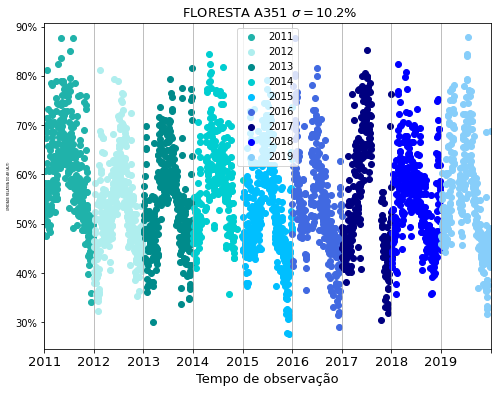

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t[:365],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][:365],color='lightseagreen',label = '2011')           #2011
plt.scatter(t[365:731],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][365:731],color='paleturquoise',label = '2012')     #2012
plt.scatter(t[731:1095],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][731:1095],color='darkcyan',label = '2013')        #2013
plt.scatter(t[1095:1370],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][1095:1370],color='darkturquoise',label = '2014') #2014
plt.scatter(t[1370:1735],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][1370:1735],color='deepskyblue',label = '2015')   #2015
plt.scatter(t[1735:2072],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][1735:2072],color='royalblue',label = '2016')     #2016
plt.scatter(t[2072:2365],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][2072:2365],color='navy',label = '2017')          #2017
plt.scatter(t[2365:2730],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][2365:2730],color='blue',label = '2018')          #2018
plt.scatter(t[2730:3063],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][2730:3063],color='lightskyblue',label = '2019')  #2019
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r' FLORESTA A351 $\sigma = 10.2\%$', size = 13)
plt.xlabel('Tempo de observação',size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 3)
plt.xlim(0,9)
plt.xticks(np.arange(0,10,1),['2011','2012','2013','2014','2015','2016','2017','2018','2019'], rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('umidade_2011-2019.png')
plt.show()

## **INDIVIDUAIS**

### 2011

In [ ]:
#Inicio das observaçoes
it = ['2011-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

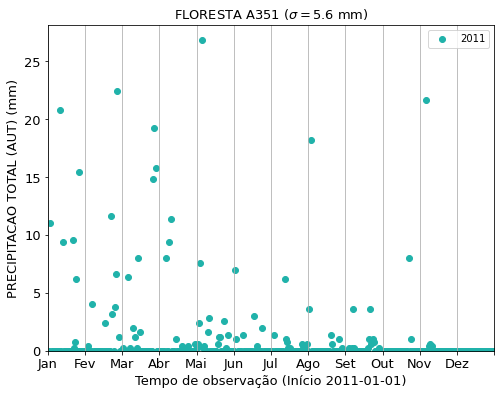

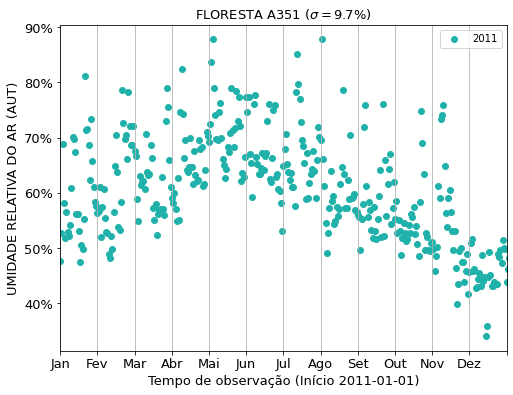

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[:365],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][:365],color='lightseagreen',label = '2011')                  #2011
plt.title(r'FLORESTA A351 ($\sigma = 5.6$ mm)', size = 13)
plt.xlabel('Tempo de observação (Início 2011-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_2011.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[:365],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][:365],color='lightseagreen',label = '2011')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 9.7\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2011-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2011.png')
plt.legend()
plt.show()

### 2012

In [ ]:
#Inicio das observaçoes
it = ['2012-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

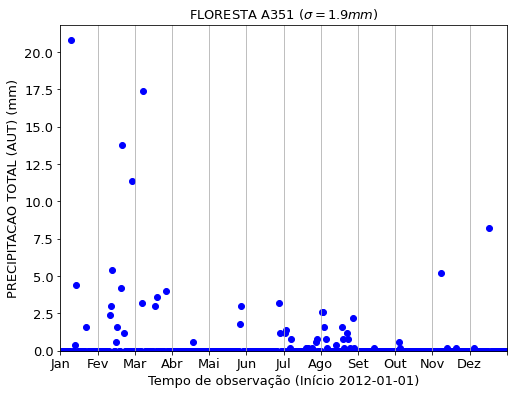

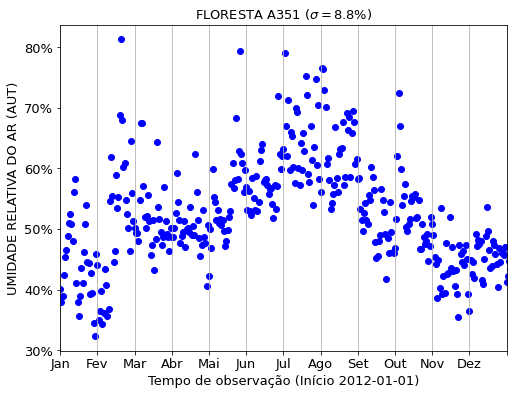

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[365:731],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][365:731],color='blue',label = '2012')                  #2011
plt.title(r'FLORESTA A351 ($\sigma = 1.9 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2012-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2012.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[365:731],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][365:731],color='blue',label = '2012')
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 8.8\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2012-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2012.png')
plt.show()

### 2013

In [ ]:
#Inicio das observaçoes
it = ['2013-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

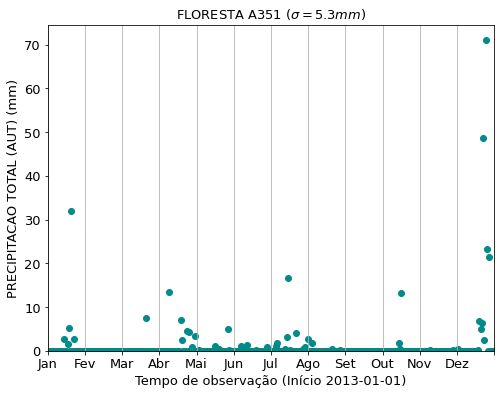

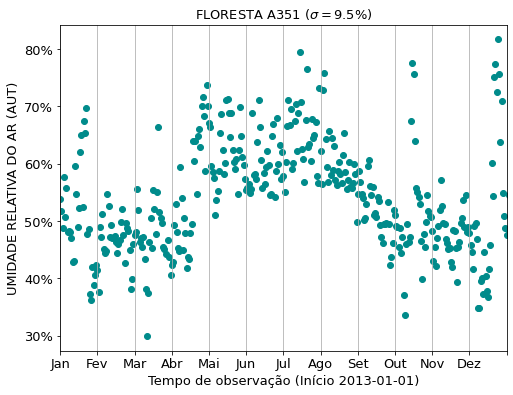

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[731:1095],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][731:1095],color='darkcyan',label = '2013') 
plt.title(r'FLORESTA A351 ($\sigma = 5.3 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2013-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2013.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[731:1095],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][731:1095],color='darkcyan',label = '2013')   
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 9.5\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2013-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2013.png')
plt.show()

### 2014

In [ ]:
#Inicio das observaçoes
it = ['2014-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

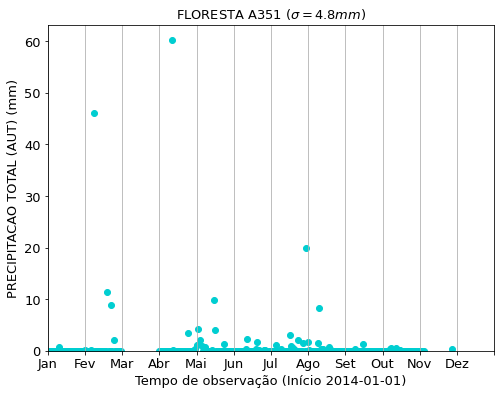

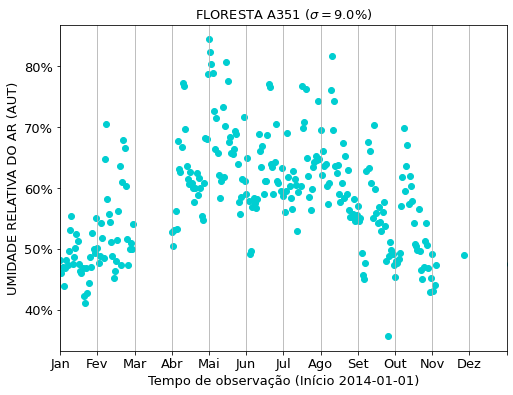

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[1095:1370],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][1095:1370],color='darkturquoise',label = '2014') 
plt.title(r'FLORESTA A351 ($\sigma = 4.8 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2014-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2014.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[1095:1370],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][1095:1370],color='darkturquoise',label = '2014')     #2014
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 9.0\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2014-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2014.png')
plt.show()

### 2015

In [ ]:
#Inicio das observaçoes
it = ['2015-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

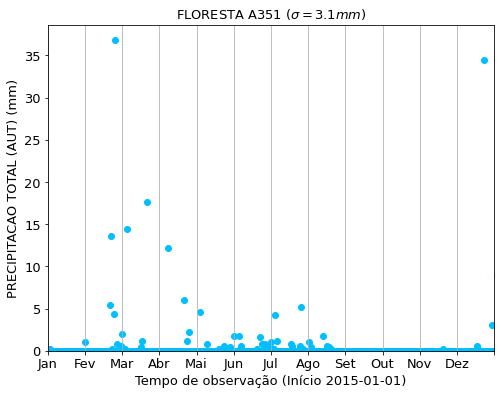

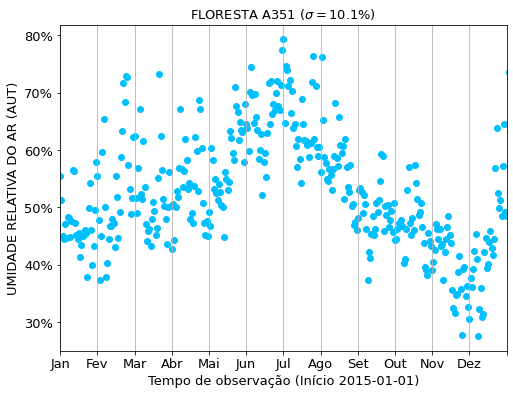

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[1370:1735],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][1370:1735],color='deepskyblue',label = '2015')     #2015
plt.title(r'FLORESTA A351 ($\sigma = 3.1 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2015-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2015.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[1370:1735],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][1370:1735],color='deepskyblue',label = '2015')     #2015
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 10.1\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2015-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2015.png')
plt.show()

### 2016

In [ ]:
#Inicio das observaçoes
it = ['2016-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

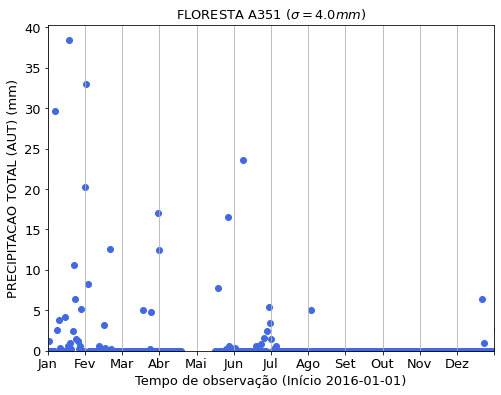

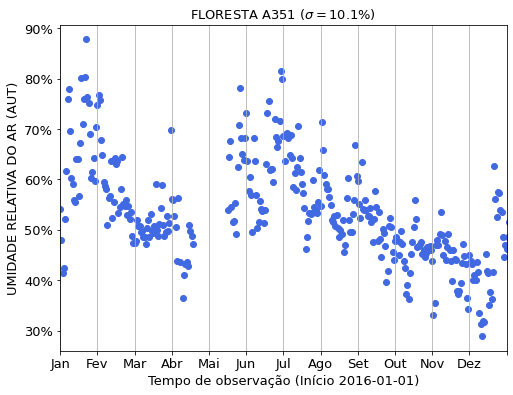

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[1735:2072],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][1735:2072],color='royalblue',label = '2016')      #2016
plt.title(r'FLORESTA A351 ($\sigma = 4.0 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2016-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2016.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[1735:2072],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][1735:2072],color='royalblue',label = '2016')      #2016
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 10.1\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2016-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2016.png')
plt.show()

### 2017

In [ ]:
#Inicio das observaçoes
it = ['2017-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

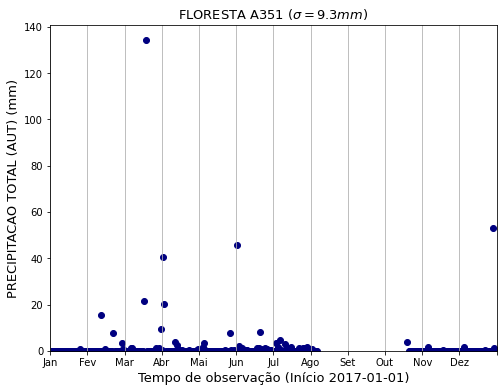

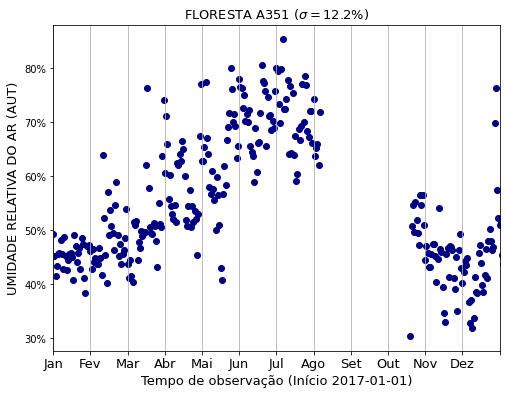

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[2072:2365],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][2072:2365],color='navy',label = '2017')      #2017
plt.title(r'FLORESTA A351 ($\sigma = 9.3 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2017-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 10)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2017.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[2072:2365],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][2072:2365],color='navy',label = '2017')      #2017
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 12.2\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2017-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2017.png')
plt.show()

### 2018

In [ ]:
#Inicio das observaçoes
it = ['2018-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

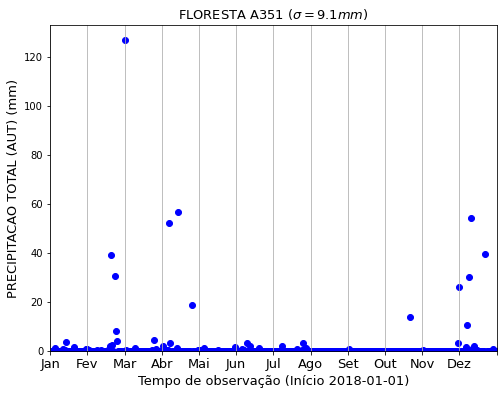

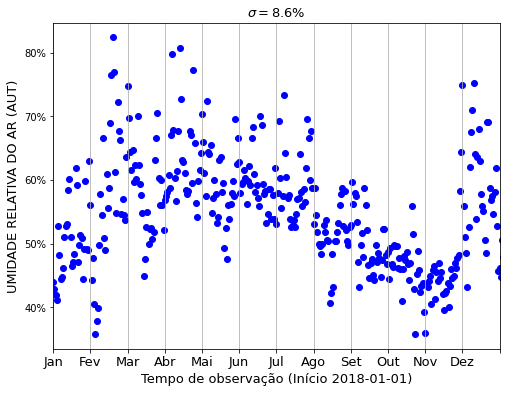

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[2365:2730],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][2365:2730],color='blue',label = '2018')       #2018
plt.title(r'FLORESTA A351 ($\sigma = 9.1 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2018-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2018.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[2365:2730],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][2365:2730],color='blue',label = '2018')       #2018
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'$\sigma = 8.6\%$', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2018-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2018.png')
plt.show()

### 2019

In [ ]:
#Inicio das observaçoes
it = ['2019-01-01']                             
itime = Time(it, format = 'iso', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(df['Data Medicao']),format='iso',scale='utc')

dt = []
t = np.empty(len(df['Data Medicao']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t[i] = dt[i].value/30

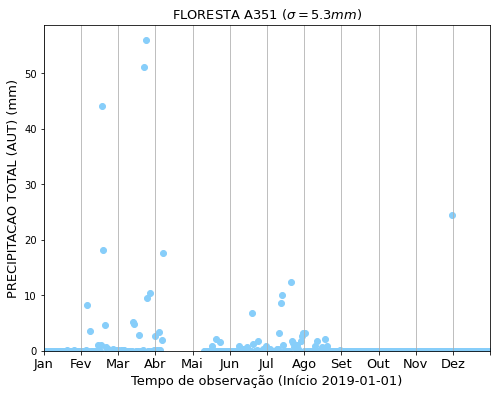

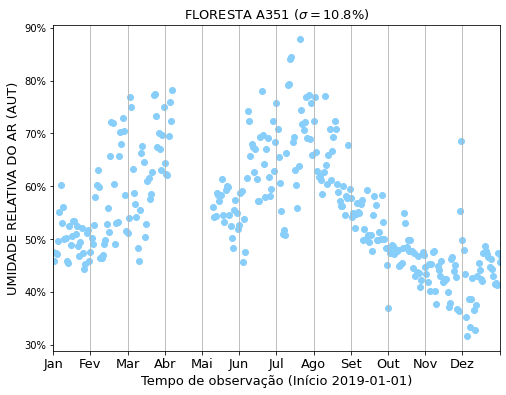

In [ ]:
plt.figure(1,figsize=(8,6))
plt.scatter(t[2730:3063],df['PRECIPITACAO TOTAL, DIARIO (AUT)(mm)'][2730:3063],color='lightskyblue',label = '2019')       #2019
plt.title(r'FLORESTA A351 ($\sigma = 5.3 mm$)', size = 13)
plt.xlabel('Tempo de observação (Início 2019-01-01)',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,9)
plt.ylim(bottom = 0)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_2019.png')

plt.figure(2,figsize=(8,6))
plt.scatter(t[2730:3063],df['UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)'][2730:3063],color='lightskyblue',label = '2019')       #2019
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'FLORESTA A351 ($\sigma = 10.8\%$)', size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlabel('Tempo de observação (Início 2019-01-01)',size = 13)
plt.xlim(0,9)
plt.xticks(np.arange(13),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2019.png')
plt.show()

# **Dados OASI**

In [ ]:
#importando dados
df_OASI = pd.read_csv('/content/Data_Todo.txt',delimiter = '\t', skiprows = 1, usecols = ['Date','Unnamed: 1','Time','Hum','Rain'])

# arrumando especificidades do arquivo
df_OASI['Time'] = df_OASI['Unnamed: 1']
df_OASI['Date'] = pd.to_datetime(df_OASI['Date'], format = '%d/%m/%y').astype(str) + 'T' + df_OASI['Time'] + ':00.00'
del df_OASI['Unnamed: 1']
del df_OASI['Time']

#df_OASI = df_OASI.sort_values(by = 'Date')

df_OASI

,Date,Hum,Rain
0,2014-09-03T7:02:00.00,20.6,0.0
1,2014-09-03T7:03:00.00,20.6,0.0
2,2014-09-03T7:04:00.00,20.6,0.0
3,2014-09-03T7:05:00.00,20.6,0.0
4,2014-09-03T7:06:00.00,20.6,0.0
...,...,...,...
235635,2018-12-06T22:21:00.00,20.8,0.0
235636,2018-12-06T22:22:00.00,20.8,0.0
235637,2018-12-06T22:23:00.00,20.8,0.0
235638,2018-12-06T22:24:00.00,20.8,0.0


In [ ]:
#pegando apenas os valores de umidade diferentes de '---'
df_OASI = df_OASI.loc[(df_OASI['Hum']) != '---']

#transformando em float
df_OASI['Hum'] = df_OASI['Hum'].astype('float64')
df_OASI.to_csv('dados_OASI.csv')

df_OASI.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<class 'pandas.core.frame.DataFrame'>
Int64Index: 191622 entries, 0 to 235639
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    191622 non-null  object 
 1   Hum     191622 non-null  float64
 2   Rain    191622 non-null  float64
dtypes: float64(2), object(1)
memory usage: 5.8+ MB


In [ ]:
'''
#Inicio das observaçoes
it = '2014-01-01T00:00:00'
itime = Time(it, format = 'isot', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos_OASI = Time(list(df_OASI['Date']),format='isot',scale='utc')

dt = []
t = np.empty(len(df_OASI['Date']))

for i in range(len(lista_tempos_OASI)):
    dt.append(lista_tempos_OASI[i] - itime)
    t[i] = dt[i].value/365
'''

"\n#Inicio das observaçoes\nit = '2014-01-01T00:00:00'\nitime = Time(it, format = 'isot', scale = 'utc' )\n\n### Gerando uma lista com as datas\nlista_tempos_OASI = Time(list(df_OASI['Date']),format='isot',scale='utc')\n\ndt = []\nt = np.empty(len(df_OASI['Date']))\n\nfor i in range(len(lista_tempos_OASI)):\n    dt.append(lista_tempos_OASI[i] - itime)\n    t[i] = dt[i].value/365\n"

In [ ]:
#lista_tempos_OASI

In [ ]:
#len(t)

####PLOTS

##### **TODAS**

In [ ]:
dados_2014 = df_OASI.set_index('Date').filter(like='2014-',axis=0).reset_index()
dados_2015 = df_OASI.set_index('Date').filter(like='2015-',axis=0).reset_index()
dados_2016 = df_OASI.set_index('Date').filter(like='2016-',axis=0).reset_index()
dados_2017 = df_OASI.set_index('Date').filter(like='2017-',axis=0).reset_index()
dados_2018 = df_OASI.set_index('Date').filter(like='2018-',axis=0).reset_index()

In [ ]:
#Inicio das observaçoes
it = '2014-01-01T00:00:00'
itime = Time(it, format = 'isot', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(dados_2014['Date']),format='isot',scale='utc')

dt = []
t_2014 = np.empty(len(dados_2014['Date']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t_2014[i] = dt[i].value/365

In [ ]:
#Inicio das observaçoes
it = '2015-01-01T00:00:00'
itime = Time(it, format = 'isot', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(dados_2015['Date']),format='isot',scale='utc')

dt = []
t_2015 = np.empty(len(dados_2015['Date']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t_2015[i] = dt[i].value/365

In [ ]:
#Inicio das observaçoes
it = '2016-01-01T00:00:00'
itime = Time(it, format = 'isot', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(dados_2016['Date']),format='isot',scale='utc')

dt = []
t_2016 = np.empty(len(dados_2016['Date']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t_2016[i] = dt[i].value/365

In [ ]:
#Inicio das observaçoes
it = '2017-01-01T00:00:00'
itime = Time(it, format = 'isot', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(dados_2017['Date']),format='isot',scale='utc')

dt = []
t_2017 = np.empty(len(dados_2017['Date']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t_2017[i] = dt[i].value/365

In [ ]:
#Inicio das observaçoes
it = '2018-01-01T00:00:00'
itime = Time(it, format = 'isot', scale = 'utc' )

### Gerando uma lista com as datas
lista_tempos = Time(list(dados_2018['Date']),format='isot',scale='utc')

dt = []
t_2018 = np.empty(len(dados_2018['Date']))

for i in range(len(lista_tempos)):
    dt.append(lista_tempos[i] - itime)
    t_2018[i] = dt[i].value/365

In [ ]:
t_2014

array([0.67203577, 0.67203767, 0.67203957, ..., 0.9601503 , 0.96015221,
       0.96015411])

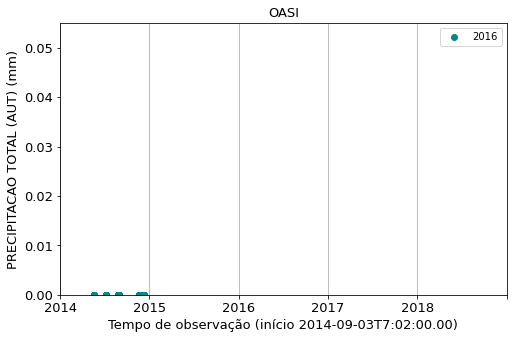

In [ ]:
plt.figure(figsize=(8,5))
#plt.scatter(t,df_OASI['Rain'], label = 201)
#plt.scatter(t_2014,dados_2014['Rain'], label = 2014, color = 'navy')
#plt.scatter(t_2015,dados_2015['Rain'], label = 2015, color = 'blue')
plt.scatter(t_2016,dados_2016['Rain'], label = 2016, color = 'darkcyan')
#plt.scatter(t_2017,dados_2017['Rain'], label = 2017, color = 'darkturquoise')
#plt.scatter(t_2018,dados_2018['Rain'], label = 2018, color = 'royalblue')
plt.title(r'OASI', size = 13)
plt.xlabel('Tempo de observação ' + '(início '+str(df_OASI['Date'][0] + ')'),size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.yticks(size = 13)
#plt.xlim(0,5)
plt.ylim(bottom = 0,)
plt.grid(axis = 'x')
plt.legend()
plt.savefig('precipitacao_2014-2018_OASI.png')
plt.show()


ValueError: ignored

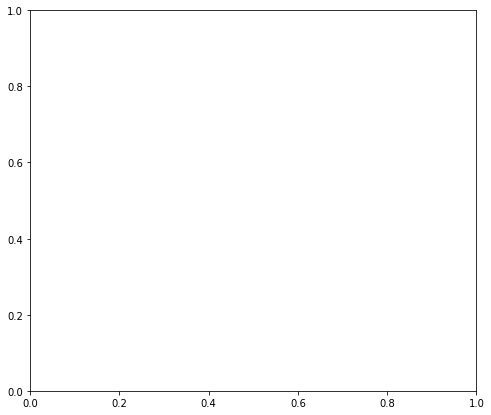

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(t,df_OASI['Hum'])
#plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])  #porcentagem
plt.title(r'OASI', size = 10)
plt.xlabel('Tempo de observação ' + '(início '+str(df_OASI['Date'][0] + ')'),size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)
plt.xlim(0,5)
plt.xticks(np.arange(0,5,1),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.yticks(size  = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_2014-2018_OASI.png')
plt.show()

##### **INDIVIDUAIS**

###### 2014

In [ ]:
#dados_2014 = dados_2014.sort_values(by=['Date'])
dados_2014

In [ ]:
t_2016

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2014,dados_2014['Rain'])
plt.title(r'OASI - 2014', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2014['Date'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_OASI-2014.png')
plt.show

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2014,dados_2014['Hum'])
plt.title(r'OASI - 2014', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2014['Date'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_OASI-2014.png')
plt.show

###### 2015

In [ ]:
#dados_2015 = dados_2015.sort_values(by=['Date'])
dados_2015

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2015,dados_2015['Rain'])
plt.title(r'OASI - 2015 ', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2015['Date'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 5)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_OASI-2015.png')
plt.show

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2015,dados_2015['Hum'])
plt.title(r'OASI - 2015 ', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2015['Date'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_OASI-2015.png')
plt.show

###### 2016

In [ ]:
#dados_2016 = dados_2016.sort_values(by=['Date'])
dados_2016

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2016,dados_2016['Rain'])
plt.title(r'OASI - 2016', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2016['Date'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(0)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_OASI-2016.png')
plt.show

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2016,dados_2016['Hum'])
plt.title(r'OASI - 2016', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2016['Date'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_OASI-2016.png')
plt.show

###### 2017

In [ ]:
#dados_2017 = dados_2017.sort_values(by=['Date'])
dados_2017

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2017,dados_2017['Rain'])
plt.title(r'OASI - 2017 ', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2017['Date'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 1)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_OASI-2017.png')
plt.show

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2017,dados_2017['Hum'])
plt.title(r'OASI - 2017 ', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2017['Date'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_OASI-2017.png')
plt.show

###### 2018

In [ ]:
#dados_2018 = dados_2018.sort_values(by=['Date'])
dados_2018

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2018,dados_2018['Hum'])
plt.title(r'OASI - 2018', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2018['Date'][0]) + ')',size = 13)
plt.ylabel('UMIDADE',size=13)
#plt.ylim(bottom = 0, top = 120)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('umidade_OASI-2018.png')
plt.show

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(t_2018,dados_2018['Rain'])
plt.title(r'OASI - 2018 ', size = 13)
plt.xlabel('Tempo de observação ' + '(início ' + str(dados_2018['Date'][0]) + ')',size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.ylim(bottom = 0, top = 30)
plt.xlim(-1,11)
plt.xticks(np.arange(-1,11),('Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez'), rotation = 0, size = 13)
plt.yticks(size = 13)
plt.grid(axis = 'x')
plt.savefig('precipitacao_OASI-2018.png')
plt.show

####MÉDIA DIÁRIA

In [ ]:
'''
dados['Date'] = df_OASI['Date'] #é melhor esse formato pra usar no groupby
dados
'''

In [ ]:
df_OASI

In [ ]:
df_OASI['Date'] = pd.to_datetime(df_OASI['Date'], utc = True) #transformando a coluna date em date type

In [ ]:
df_OASI.info()

In [ ]:
#media anual
dados_ano = df_OASI[['Hum','Rain']].groupby(by=df_OASI.Date.dt.year).mean()
dados_ano

In [ ]:
#media diaria
dados_dia = df_OASI.groupby(by=df_OASI.Date.dt.date).mean()
dados_dia

In [ ]:
dados_dia.info()

In [ ]:
len(t)

In [ ]:
plt.figure(figsize = (8,6))
plt.title(r'OASI - Média diária', size = 16)

plt.scatter(t,df_OASI['Hum'])

plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + df_OASI['Date'][0] + ')', size = 13)
plt.xlim(0,5)

plt.yticks(size = 13)
plt.ylabel('UMIDADE RELATIVA DO AR (AUT)', size = 13)


plt.grid(axis = 'x')
plt.savefig('umidade_2014-2018_OASI-mediadiaria.png')

In [ ]:
plt.figure(figsize = (8,6))
plt.title(r'OASI - Média diária', size = 16)

plt.scatter(t,df_OASI['Rain'])

plt.xticks(np.arange(0,6),['2014','2015','2016','2017','2018'], rotation = 0, size = 13)
plt.xlabel('Tempo de observação' + ' (Início ' + df_OASI['Date'][0] + ')', size = 13)
plt.xlim(0,5)

plt.yticks(size = 13)
plt.ylabel('PRECIPITACAO TOTAL (AUT) (mm)',size=13)
plt.xlim(0,5)
plt.ylim(bottom = 0)

plt.grid(axis = 'x')
plt.savefig('precipitacao_2014-2018_OASI-mediadiaria.png')